# THE NEW KEYNESIAN MODEL

Imports and set magics:

In [22]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from ipywidgets import interact, FloatSlider
import sympy as sp
from scipy.optimize import minimize


In order to run the numerical solution's code successfully the value for demand shock, cost-push shock and monetary policy shock should be input by hand in the command bar. It will be asked and you should see it appears when you run the code.

# Model description

A New Keynesian model is a framework used in macroeconomics to analyze the effects of various economic shocks on key macroeconomic variables such as output, inflation, and interest rates. It combines elements of Keynesian economics with modern macroeconomic theory. A typical New Keynesian model consists of three main equations:

IS Curve:
$$
y_t = E_t[y_{t+1}] - 1/σ * (E_t[r_t] - ρ) 
$$
Phillips Curve:
$$
π_t = κy_t + βE_t[π_{t+1}]
$$
Taylor Rule:
$$
r_t = ρ + ϕ_yE_t[y_{t+1}] + ϕ_πE_t[π_{t+1}] 
$$

The IS Curve represents the aggregate demand equation which shows the relationship between output, expected future output, the real interest rate. It reflects how changes in interest rates and expectations about future output affect current output. The Phillips Curve is the inflation equation, which represents the relationship between inflation, the output gap and eexpected future inflation. It describes how deviations of actual output from potential output influence inflation. Taylor Rule or the Monetary Policy Rule represents the central bank's reaction function, where the nominal interest rate is set based on deviations of output from potential output and inflation from target inflation.

Firstly, the three equations of the model have been coded.

In [23]:
# Defining the model equations:
# IS curve
def y_t(Exp_y_t1, sigma, Exp_r_t, rho):
    return Exp_y_t1 - (1/sigma)*(Exp_r_t-rho)

# Phillips curve
def pi_t(kappa, y_t, beta, Exp_pi_t1):
    return kappa*y_t + beta* Exp_pi_t1

# Taylor rule
def r_t(rho, phi_y, phi_pi, Exp_y_t1, Exp_pi_t1):
    return rho + phi_y * Exp_y_t1 + phi_pi * Exp_pi_t1

Next, the model has been solved using fsolve, which is an optimization function from scipy.optimize.The initial values of output, inflaton and interest rate have been assumed to be 0. Then the model has been simulated.

The reason of using fsolve rather than defining y_t, pi_t and r_t directly from the three equations is that we are dealing with a system of nonlinear equations that are interdependent. The Taylor rule, Phillips curve, and IS curve must all hold. It would not be sufficient to define these variables straight from the equations to guarantee simultaneous satisfaction of the three requirements. 

This approach ensures that the interdependencies and nonlinearities are properly accounted for, providing a consistent solution for the model's variables.

In [24]:
# Solving the model equations
def solve_model(Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi):
    # Define a function to solve using fsolve
    def equations(vars):
        yt, pi_t1, rt1 = vars
        eq1 = y_t(Exp_y_t1, sigma, rt1, rho) - yt
        eq2 = pi_t(kappa, yt, beta, Exp_pi_t1) - pi_t1
        eq3 = r_t(rho, phi_y, phi_pi, Exp_y_t1, Exp_pi_t1) - rt1
        return [eq1, eq2, eq3]
    
    # Initial guess
    guess = [0, 0, 0]
    
    # Solve using fsolve
    yt, pi_t1, rt1 = fsolve(equations, guess)
    
    return yt, pi_t1, rt1

# Simulation
def simulate_model(periods, Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi):
    y_t_values = [0]  # Initial output assumed to be 0
    pi_t_values = [0]  # Initial inflation assumed to be 0
    r_t_values = [0]  # Initial interest rate assumed to be 0
    for _ in range(int(periods)):  # Convert periods to integer
        yt, pi_t1, rt1 = solve_model(Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi)
        y_t_values.append(yt)
        pi_t_values.append(pi_t1)
        r_t_values.append(rt1)
        # Update expected values for the next period
        Exp_y_t1, Exp_r_t, Exp_pi_t1 = yt, rt1, pi_t1
    return y_t_values, pi_t_values, r_t_values





Instead of simply displaying the values of each variable, we will plot the simulated paths for key macroeconomic variables in response to different shocks. This provides a more intuitive understanding of how the economy reacts over time. The plots will include:
- Output Gap
- Inflation Rate
- Nominal Interest Rate
- Comparison to steady state values

Lastly, an interactive plot has been created. 

In [31]:
# Interactive plot function
def interactive_plot(periods, Exp_y_t1_val, Exp_r_t_val, Exp_pi_t1_val, sigma_val, rho_val, kappa_val, beta_val, phi_y_val, phi_pi_val):
    y_t_values, pi_t_values, r_t_values = simulate_model(periods, Exp_y_t1_val, Exp_r_t_val, Exp_pi_t1_val, sigma_val, rho_val, kappa_val, beta_val, phi_y_val, phi_pi_val)
    
    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.plot(y_t_values)
    plt.title('Output (y_t)')
    plt.xlabel('Period')
    plt.ylabel('Output')

    plt.subplot(3, 1, 2)
    plt.plot(pi_t_values)
    plt.title('Inflation (π_t)')
    plt.xlabel('Period')
    plt.ylabel('Inflation')

    plt.subplot(3, 1, 3)
    plt.plot(r_t_values)
    plt.title('Interest Rate (r_t)')
    plt.xlabel('Period')
    plt.ylabel('Interest Rate')

    plt.tight_layout()
    plt.show()

# Set up the interactive widget
interact(interactive_plot,
         periods=FloatSlider(min=1, max=100, step=1, value=50, description='Periods'),
         Exp_y_t1_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='Exp_y_t1'),
         Exp_r_t_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='Exp_r_t'),
         Exp_pi_t1_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='Exp_pi_t1'),
         sigma_val=FloatSlider(min=0, max=2, step=0.1, value=1.5, description='sigma'),
         rho_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='rho'),
         kappa_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='kappa'),
         beta_val=FloatSlider(min=0, max=1, step=0.1, value=0.99, description='beta'),
         phi_y_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='phi_y'),
         phi_pi_val=FloatSlider(min=0, max=2, step=0.1, value=1.5, description='phi_pi')
        );


interactive(children=(FloatSlider(value=50.0, description='Periods', min=1.0, step=1.0), FloatSlider(value=0.5…

In [26]:
# Interactive plot function
def interactive_plot(periods, Exp_y_t1_val, Exp_r_t_val, Exp_pi_t1_val, sigma_val, rho_val, kappa_val, beta_val, phi_y_val, phi_pi_val):
    y_t_values, pi_t_values, r_t_values = simulate_model(periods, Exp_y_t1_val, Exp_r_t_val, Exp_pi_t1_val, sigma_val, rho_val, kappa_val, beta_val, phi_y_val, phi_pi_val)
    
    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.plot(y_t_values)
    plt.title('Output (y_t)')
    plt.xlabel('Period')
    plt.ylabel('Output')

    plt.subplot(3, 1, 2)
    plt.plot(pi_t_values)
    plt.title('Inflation (π_t)')
    plt.xlabel('Period')
    plt.ylabel('Inflation')

    plt.subplot(3, 1, 3)
    plt.plot(r_t_values)
    plt.title('Interest Rate (r_t)')
    plt.xlabel('Period')
    plt.ylabel('Interest Rate')

    plt.tight_layout()
    plt.show()

# Set up the interactive widget
interact(interactive_plot,
         periods=FloatSlider(min=1, max=100, step=1, value=50, description='Periods'),
         Exp_y_t1_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='Exp_y_t1'),
         Exp_r_t_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='Exp_r_t'),
         Exp_pi_t1_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='Exp_pi_t1'),
         sigma_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='sigma'),
         rho_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='rho'),
         kappa_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='kappa'),
         beta_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='beta'),
         phi_y_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='phi_y'),
         phi_pi_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='phi_pi')
        );

interactive(children=(FloatSlider(value=50.0, description='Periods', min=1.0, step=1.0), FloatSlider(value=0.5…

## Analytical solution

From the values ploted before, we will solve the model by choosing random values.

Here, we wanted first to solve the model as it is, so we wrote some code in order to find the optimal values for each variables we have defined above, except for "periods" which will be set as 100. 

We wanted to set all the variable as "completely" random so that we could find the steady state of the model. 

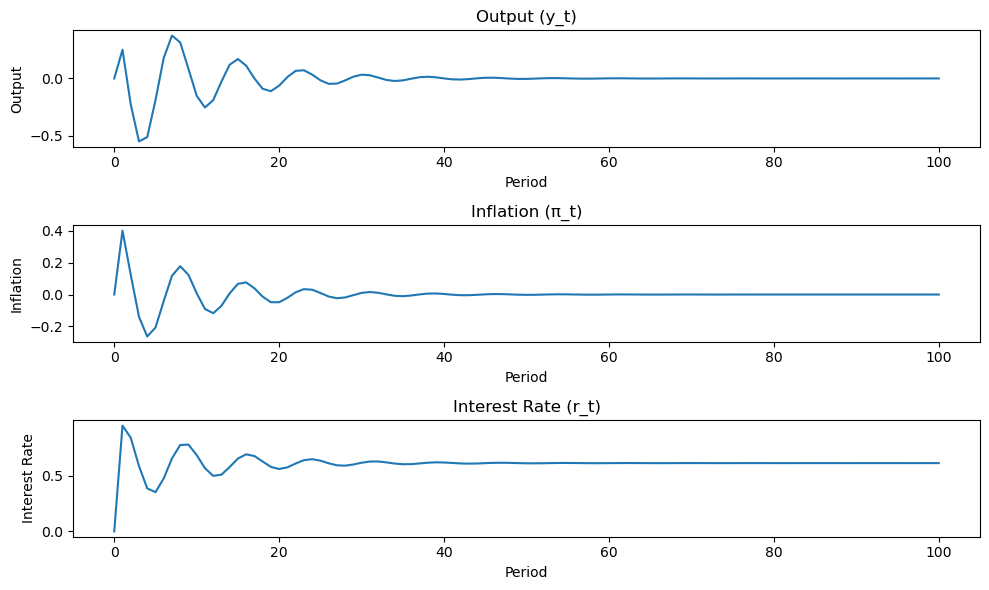

Optimal values:
Exp_y_t1: 0.36812420192763595
Exp_r_t: 0.6947743506223676
Exp_pi_t1: 0.5940535955660234
sigma: 0.7034060312409646
rho: 0.6121335892348448
kappa: 0.37168810648941386
beta: 0.5191127344185607
phi_y: 0.3181805935294851
phi_pi: 0.36817425625516204


In [27]:

# Define the model equations
def y_t(Exp_y_t1, sigma, Exp_r_t, rho):
    return Exp_y_t1 - (1/sigma)*(Exp_r_t - rho)

def pi_t(kappa, y_t, beta, Exp_pi_t1):
    return kappa * y_t + beta * Exp_pi_t1

def r_t(rho, phi_y, phi_pi, Exp_y_t1, Exp_pi_t1):
    return rho + phi_y * Exp_y_t1 + phi_pi * Exp_pi_t1

# Simulation function
def simulate_model(params):
    Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi = params
    periods = 100  # Assuming a fixed number of periods for simulation
    y_t_values = [0]  # Initial output assumed to be 0
    pi_t_values = [0]  # Initial inflation assumed to be 0
    r_t_values = [0]  # Initial interest rate assumed to be 0
    for _ in range(periods):
        yt = y_t(Exp_y_t1, sigma, Exp_r_t, rho)
        pi_t1 = pi_t(kappa, yt, beta, Exp_pi_t1)
        rt1 = r_t(rho, phi_y, phi_pi, Exp_y_t1, Exp_pi_t1)
        y_t_values.append(yt)
        pi_t_values.append(pi_t1)
        r_t_values.append(rt1)
        Exp_y_t1, Exp_r_t, Exp_pi_t1 = yt, rt1, pi_t1
    return y_t_values, pi_t_values, r_t_values

# Define the objective function to minimize the sum of squared errors
def objective_function(params):
    simulated_y, simulated_pi, simulated_r = simulate_model(params)
    # Random target values for demonstration
    target_y = np.random.rand(len(simulated_y))
    target_pi = np.random.rand(len(simulated_pi))
    target_r = np.random.rand(len(simulated_r))
    # Calculate sum of squared errors
    error_y = np.sum((simulated_y - target_y) ** 2)
    error_pi = np.sum((simulated_pi - target_pi) ** 2)
    error_r = np.sum((simulated_r - target_r) ** 2)
    return error_y + error_pi + error_r

# Define initial guesses for the parameters
initial_guess = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]  # You may need to provide reasonable initial guesses

# Perform optimization to find optimal values
result = minimize(objective_function, initial_guess, method='Nelder-Mead')

# Get the optimal values
optimal_values = result.x

# Simulate the model with optimal values
simulated_y, simulated_pi, simulated_r = simulate_model(optimal_values)

# Plot the simulated values
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(simulated_y)
plt.title('Output (y_t)')
plt.xlabel('Period')
plt.ylabel('Output')

plt.subplot(3, 1, 2)
plt.plot(simulated_pi)
plt.title('Inflation (π_t)')
plt.xlabel('Period')
plt.ylabel('Inflation')

plt.subplot(3, 1, 3)
plt.plot(simulated_r)
plt.title('Interest Rate (r_t)')
plt.xlabel('Period')
plt.ylabel('Interest Rate')

plt.tight_layout()
plt.show()

# Print the optimal values with variable names
variable_names = ["Exp_y_t1", "Exp_r_t", "Exp_pi_t1", "sigma", "rho", "kappa", "beta", "phi_y", "phi_pi"]
print("Optimal values:")
for name, value in zip(variable_names, optimal_values):
    print(name + ":", value)


After finding the optimal values for every variables, we found our 3 optimized equations. 

These three equations are usefull as they are at the very heart of every DGSE (Dynamic Stochastic General Equilibrium) model. 
Also, this is micro-founded, so it can survive to the Lucas critics.

Finally, with the optimal values, the three equations should look like the one ploted above. 

## Numerical solution

In order to run the numerical solution's code successfully the value for demand shock, cost-push shock and monetary policy shock should be input by hand in the command bar. It will be asked and you should see it appears when you run the code.


IS Curve:
$$
y_t = E_t[y_{t+1}] - 1/σ * (E_t[r_t] - ρ) + u_{IS}
$$
Phillips Curve:
$$
π_t = κy_t + βE_t[π_{t+1}] + u_{CP}
$$
Taylor Rule:
$$
r_t = ρ + ϕ_yE_t[y_{t+1}] + ϕ_πE_t[π_{t+1}] + u_{MP}
$$

In [28]:
# Optimal expected values
Exp_y_t1 = 0.32698473454219756
Exp_r_t = 0.735243786811864
Exp_pi_t1 = 0.610607097923002

# Parameters
sigma = 0.7638707782341321
rho = 0.6593345132625752
kappa = 0.3351455451896026
beta = 0.5601533588416543
phi_y = 0.2946023646250788
phi_pi = 0.28832123649374375

def model_system(vars, u_IS, u_CP, u_MP):
    y, pi, r = vars

    # IS curve equation (demand shock)
    IS_eq = y - (Exp_y_t1 - (1 / sigma) * (Exp_r_t - rho) + u_IS)

    # Phillips curve equation (cost-push shock)
    PC_eq = pi - (kappa * y + beta * Exp_pi_t1 + u_CP)

    # Monetary policy rule (monetary policy shock)
    MP_eq = r - (rho + phi_y * Exp_y_t1 + phi_pi * Exp_pi_t1 + u_MP)

    return [IS_eq, PC_eq, MP_eq]

def solve_system(u_IS, u_CP, u_MP):
    def wrapper(vars):
        return model_system(vars, u_IS, u_CP, u_MP)

    # Initial guess for the solver
    initial_guess = [0, 0, 0]

    # Solve the system with fsolve
    return fsolve(wrapper, initial_guess)

# Get shock inputs from the user or external source
u_IS_input = float(input("Enter value for demand shock (u_IS): "))
u_CP_input = float(input("Enter value for cost-push shock (u_CP): "))
u_MP_input = float(input("Enter value for monetary policy shock (u_MP): "))

# Solve the system with provided shock values
solution = solve_system(u_IS_input, u_CP_input, u_MP_input)

# Extract the solutions
output, inflation, interest_rate = solution

# Print results
print(f"Output: {output}, Inflation: {inflation}, Interest Rate: {interest_rate}")

Output: 0.3276102386035376, Inflation: 0.501830728860603, Interest Rate: 0.9567159827400267


# Conclusion

The purpose of the New Keynesian model is to analyze how various economic shocks (demand shock, cost-push shock, monetary policy shock) affect key macroeconomic variables such as output, inflation, and interest rates. It helps economists and policymakers understand the dynamics of the economy and design appropriate policy responses to stabilize the economy, such as monetary policy adjustments in response to changes in output and inflation. 
The model could be extended by a fourth equation known as the Output Gap Evolution Equation.It describes how potential output evolves over time and depends on exogenous factors like technological progress or demographic changes.

Output Gap Evolution Equation:
$$
Y^*_{t+1} = Y^*_{t} +γ(Y_t - Y^*_{t+}) + ϵ
$$
The purpose of including this equation is to capture the long-term trends in the economy and how they influence short-term dynamics. 
​